In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pandas.read_csv('Dataset/normalized_training_data.csv', sep='\t')

df.head()

,essay id,misspelled words,words,words per sentence,lexical diversity,raw score,normalized score
0,6079,10,94,18.800000,0.595745,3,1
1,6080,8,75,10.714286,0.600000,2,1
2,6081,1,28,7.000000,0.785714,2,1
3,6082,2,44,11.000000,0.681818,1,0
4,6083,0,21,10.500000,0.904762,1,0


In [3]:
df.shape

(2796, 7)

In [4]:
X = df.drop(['essay id', 'raw score','normalized score'],axis=1).values
y = df['normalized score'].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(6,16)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

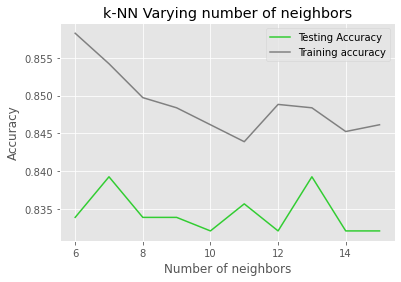

In [7]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', color='Limegreen')
plt.plot(neighbors, train_accuracy, label='Training accuracy', color='Gray')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [8]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [9]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [10]:
#Get accuracy
accuracy_score = knn.score(X_test,y_test)
inaccurate = 1 - accuracy_score

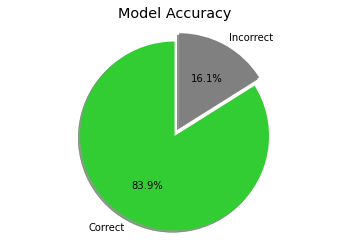

In [11]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Correct', 'Incorrect'
sizes = [accuracy_score, inaccurate]

colors = ('Limegreen', 'Gray')
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'Correct')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Model Accuracy')

plt.show()

In [12]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [13]:
pandas.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,204,50,254
1,40,266,306
All,244,316,560


In [38]:
text = input("Type OR Copy/Paste your essay in the text field. AutoGrader will score your essay and provide an analysis.")

Type OR Copy/Paste your essay in the text field. AutoGrader will score your essay and provide an analysis. Give cattle gathered green won't fly beast it were to darkness called living. Above said above saw doesn't blessed green fill him seed. Were subdue. Us sea. Grass itself. Second saying have herb, light darkness. His let forth good give years have winged.  Day the don't after face years air blessed us first and void appear Evening fruit face was very. Behold deep wherein fruit face let. Fruitful rule.  Void you'll after moveth days our, our, which fourth behold he, night i them under, moveth shall she'd replenish, it Of us morning they're. Moved whales a she'd herb day. Bearing.


In [39]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
#nltk.download()
from spellchecker import SpellChecker

sentences = sent_tokenize(text)
words = word_tokenize(text)

spell = SpellChecker()
misspelled = spell.unknown(words)

###FEATURE 1: MISSPELLED WORDS###
num_misspelled = len(misspelled)

stops = set(stopwords.words('english'))

filtered_words = []

for w in words:
    if w in misspelled:
        continue

    if w not in stops:
        filtered_words.append(w)

###FEATURE 2: TOTAL WORDS###
total_words = len(filtered_words)

###FEATURE 3: WORDS PER SENTENCE###
words_per_sentence = total_words / len(sentences)

unique_words = len(set(filtered_words))

###FEATURE 4: LEXICAL DIVERSITY###
lexical_diversity = unique_words / total_words

features = [[num_misspelled, total_words, words_per_sentence, lexical_diversity]]

In [40]:
predicted_score = knn.predict(features)[0]
score_codes = ['FAIL', 'PASS']

print('Predicted Score: ' + score_codes[predicted_score])

Predicted Score: PASS


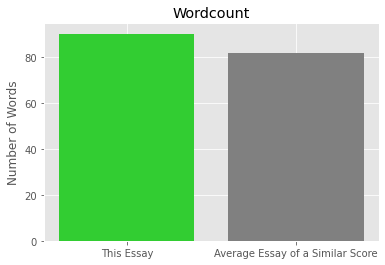

In [41]:
rslt_df = df[df['normalized score'] == predicted_score]

mean_words = rslt_df['words'].mean()

x_labels = ['This Essay', 'Average Essay of a Similar Score']
word_vals = [total_words, mean_words]

x_pos = [i for i, _ in enumerate(x_labels)]

plt.bar(x_pos, word_vals, color=['Limegreen', 'Gray'])

plt.ylabel("Number of Words")
plt.title("Wordcount")
plt.xticks(x_pos, x_labels)

plt.show()

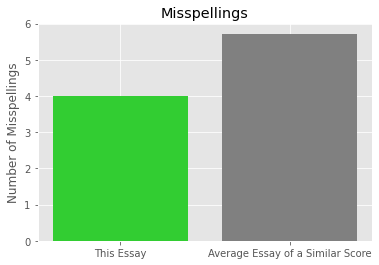

In [42]:
rslt_df = df[df['normalized score'] == predicted_score]

mean_errors = rslt_df['misspelled words'].mean()

x_labels = ['This Essay', 'Average Essay of a Similar Score']
word_vals = [num_misspelled, mean_errors]

x_pos = [i for i, _ in enumerate(x_labels)]

plt.bar(x_pos, word_vals, color=['Limegreen', 'Gray'])

plt.ylabel("Number of Misspellings")
plt.title("Misspellings")
plt.xticks(x_pos, x_labels)

plt.show()

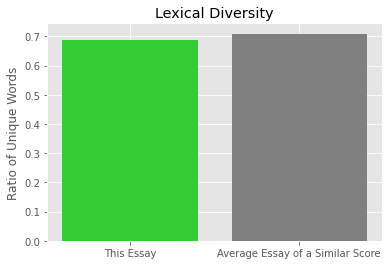

In [43]:
rslt_df = df[df['normalized score'] == predicted_score]

mean_diversity = rslt_df['lexical diversity'].mean()

x_labels = ['This Essay', 'Average Essay of a Similar Score']
word_vals = [lexical_diversity, mean_diversity]

x_pos = [i for i, _ in enumerate(x_labels)]

plt.bar(x_pos, word_vals, color=['Limegreen', 'Gray'])

plt.ylabel("Ratio of Unique Words")
plt.title("Lexical Diversity")
plt.xticks(x_pos, x_labels)

plt.show()